### 聚类算法实践
- Kmeans与Dbscan算法
- 半监督问题解决方案
- 聚类评估方法

<img src='img/401.jpg'>

In [2]:
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)


### KMeans

In [3]:
from sklearn.datasets import make_blobs
# 构造五个簇用于聚类 
# 1. 构造五个中心点; 
blob_centers = np.array(
                        [[0.2,2.3],
                         [-1.5,2.3],
                         [-2.8,1.8],
                         [-2.8,2.8],
                         [-2.8,1.3]]
                        )

# 2. 构造以这五个中心点的半径
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [4]:
X,y = make_blobs(n_samples=2000, centers=blob_centers,
                cluster_std=blob_std, random_state=7)   

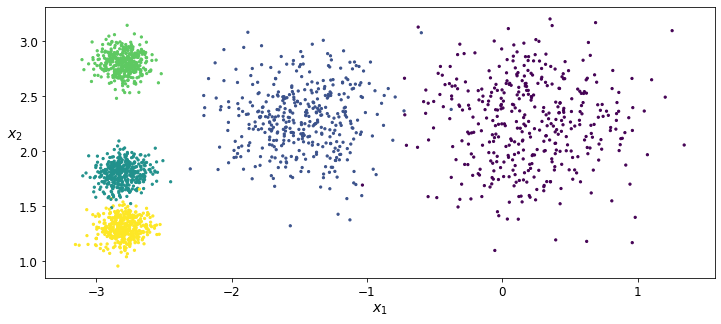

In [7]:
def plot_clusters(X, y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=5)
    plt.xlabel(r'$x_1$', fontsize=14)
    plt.ylabel(r'$x_2$', fontsize=14,rotation=0)
plt.figure(figsize=(12,5))
# plot_clusters(X,np.random.rand(X.shape[0]))
plot_clusters(X,y)

### 决策边界

In [21]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)


y_pred与kmeans.labels_得到的预测值是一样的

In [22]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [23]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [24]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [26]:
X_new = np.array([[0,2],[2,3],[3,2.5],[-2,2.5]])
kmeans.predict(X_new)

array([1, 1, 1, 3])

transform可以帮助我们计算每个点到每个质心(中心点)的距离

In [66]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [4.95122083, 1.93979126, 4.79722508, 3.53958744, 5.09223009],
       [5.8458156 , 2.80192387, 5.80048146, 4.47192627, 5.92303856],
       [1.06517531, 2.2222529 , 0.84649544, 0.57460014, 1.44174253]])

In [33]:
np.linspace(1,2,2)

array([1., 2.])

In [34]:
np.linspace(10,20,3)

array([10., 15., 20.])

In [29]:
x0,x1 = np.meshgrid(np.linspace(1,2,2),np.linspace(10,20,3))

In [35]:
x1

array([[10., 10.],
       [15., 15.],
       [20., 20.]])

In [74]:
def plot_data(X):
    plt.plot(X[:,0],X[:,1],'k.',markersize=2)

def plot_centorids(centroids, weights=None, circle_color='w',cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max()/10]
    plt.scatter(centroids[:,0],centroids[:,1],marker='o',s=50,linewidths=8,color=circle_color,zorder=10,alpha=0.9)
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=50,linewidths=4,color=cross_color,zorder=11,alpha=1)

def plot_decision_boundaries(clusterer,X,resolution=1000,show_centroids=True,show_xlabels=True,show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx , yy = np.meshgrid(
                        np.linspace(mins[0],maxs[0],resolution),
                        np.linspace(mins[1],maxs[1],resolution)
                        )
    X_ = np.c_[xx.ravel(),yy.ravel()]
    Z = clusterer.predict(X_)
    Z = Z.reshape(xx.shape)
    plt.contourf(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]),cmap='Pastel2')
    plt.contour(Z, extent=(mins[0],maxs[0],mins[1],maxs[1]),linewidths=1,colors='k')
    plot_data(X)
    if show_centroids:
        plot_centorids(clusterer.cluster_centers_)
    
    if show_xlabels:
        plt.xlabel(r'$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom='off')
    
    if show_ylabels:
        plt.ylabel(r'$x_2$', fontsize=14,rotation=0)
    else:
        plt.tick_params(labelleft='off')


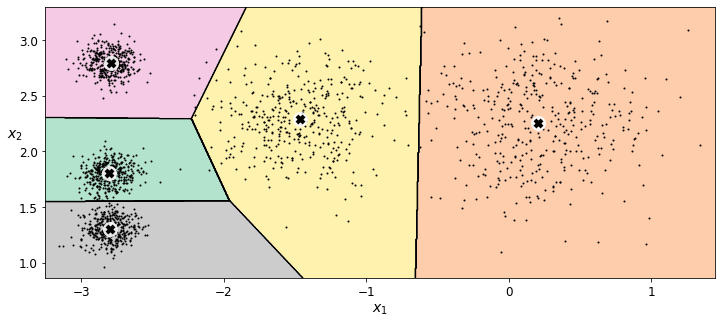

In [75]:
plt.figure(figsize=(12,5))
plot_decision_boundaries(kmeans,X)


### 算法流程

In [76]:
kmeans_iter1 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init='random', n_init=1, max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=1)

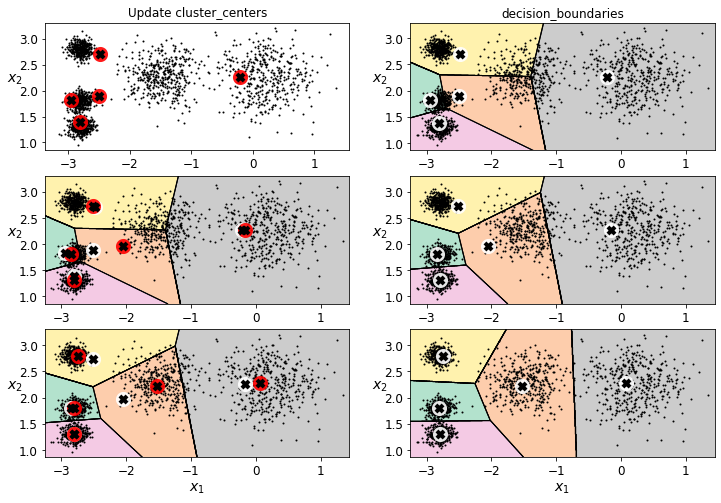

In [77]:
plt.figure(figsize=(12,8))
plt.subplot(321)
plot_data(X)
plot_centorids(kmeans_iter1.cluster_centers_,  circle_color='r',cross_color='k')
plt.title('Update cluster_centers')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14,rotation=0)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1,X)
plt.title('decision_boundaries')

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1,X)
plot_centorids(kmeans_iter2.cluster_centers_,  circle_color='r',cross_color='k')

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2,X)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2,X)
plot_centorids(kmeans_iter3.cluster_centers_,  circle_color='r',cross_color='k')

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3,X)

### 不稳定的结果

In [78]:
def plot_clusterer_comparison(c1,c2,X):
    c1.fit(X)
    c2.fit(X)
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_decision_boundaries(c1,X)
    plt.subplot(122)
    plot_decision_boundaries(c2,X)

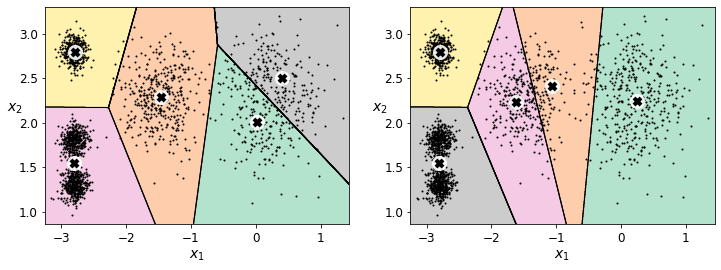

In [79]:
c1 = KMeans(n_clusters=5, init='random', n_init=1, random_state=11)
c2 = KMeans(n_clusters=5, init='random', n_init=1, random_state=19)

plot_clusterer_comparison(c1,c2,X)

### 评估方法
- Inertia指标: 每个样本与其质心距离的平方和

In [80]:
kmeans.inertia_

211.59853725816836

In [88]:
X_dist = kmeans.transform(X)

In [89]:
kmeans.transform(X)

array([[0.46779778, 3.04611916, 1.45402521, 1.54944305, 0.11146795],
       [0.07122059, 3.11541584, 0.99002955, 1.48612753, 0.51431557],
       [3.81713488, 1.32016676, 4.09069201, 2.67154781, 3.76340605],
       ...,
       [0.92830156, 3.04886464, 0.06769209, 1.40795651, 1.42865797],
       [3.10300136, 0.14895409, 3.05913478, 1.71125   , 3.23385668],
       [0.22700281, 2.8625311 , 0.85434589, 1.21678483, 0.67518173]])

In [90]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [91]:
X_dist = X_dist[np.arange(len(X_dist)), kmeans.labels_]

In [92]:
X_dist

array([0.11146795, 0.07122059, 1.32016676, ..., 0.06769209, 0.14895409,
       0.22700281])

In [94]:
np.sum(X_dist**2)

211.59853725816856

### 我们和老外的思维不一样

In [95]:
kmeans.score(X)

-211.59853725816834

In [96]:
c1.inertia_

223.29108572819035

In [97]:
c2.inertia_

237.4624916944286

### 找到最佳簇的个数
- 如果K值越大,得到的结果簇的个数肯定越多,并且inertia的值肯定越来越小

In [98]:
kmeans_list = [KMeans(n_clusters=k).fit(X) for k in range(1,10)]
inertias = [ model.inertia_ for model in kmeans_list ]

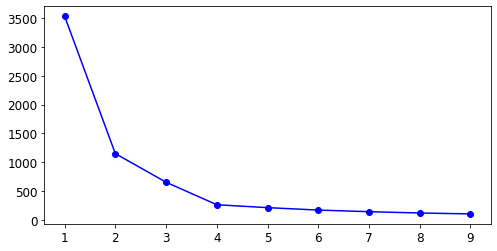

In [99]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,10), inertias, 'bo-')

<img src='img/402.jpg'>

In [100]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [102]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_list[1:]]
silhouette_scores

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.6068660656395705,
 0.561232968678303,
 0.5670167247470135]

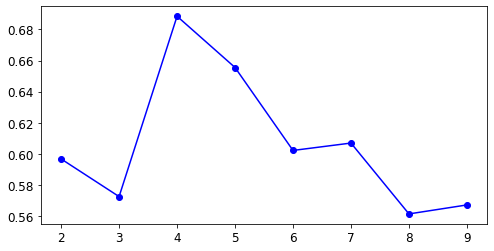

In [103]:
plt.figure(figsize=(8, 4))
plt.plot(range(2,10), silhouette_scores, 'bo-')

### Kmeans存在的问题

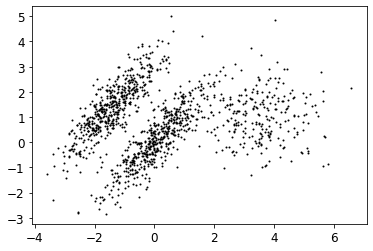

In [104]:
X1,y1 = make_blobs(n_samples=1000, centers=((4,-4),(0,0)), random_state=42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6,-8]
X = np.r_[X1,X2]
y = np.r_[y1,y2]

plot_data(X)

In [105]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5,2],[0.5,0],[4,0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

Text(0.5, 1.0, 'Bad - inertia = 2179.4842787447324')

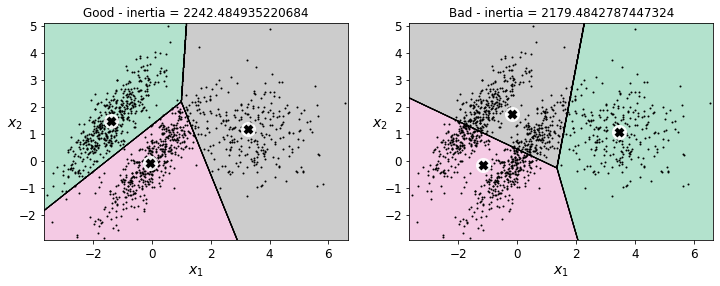

In [106]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_decision_boundaries(kmeans_good,X)
plt.title('Good - inertia = {}'.format(kmeans_good.inertia_))
plt.subplot(122)
plot_decision_boundaries(kmeans_bad,X)
plt.title('Bad - inertia = {}'.format(kmeans_bad.inertia_))


### 上面的对比图片可以看出Kmeans存在的问题, inertia指标以及其他的评估标准并不一定是最佳的. 只能作为参考

### 图像分割小栗子
<img src='img/ladybug.png'>

In [126]:
from matplotlib.image import imread
image = imread('img/ladybug.png')
image.shape


(533, 800, 3)

In [127]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [128]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [129]:
kmeans.cluster_centers_

array([[0.9836374 , 0.9359338 , 0.02574807],
       [0.02289337, 0.11064845, 0.00578198],
       [0.21914783, 0.38675755, 0.05800817],
       [0.75775605, 0.21225454, 0.0445884 ],
       [0.09990625, 0.2542204 , 0.01693457],
       [0.6126616 , 0.63010883, 0.3875199 ],
       [0.37212682, 0.5235918 , 0.15730345],
       [0.88459074, 0.7256049 , 0.03442055]], dtype=float32)

In [135]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [136]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

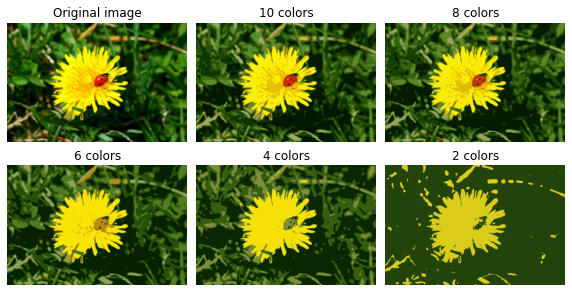

In [141]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off') # 去掉tick
for idx, n_clusters in enumerate(n_colors):
   plt.subplot(232 + idx)
   plt.imshow(segmented_imgs[idx])
   plt.title("{} colors".format(n_clusters))
   plt.axis('off')

### 半监督学习
### DBSCAN